In [1]:
import numpy as np
import xarray as xr
import pandas as pd
import glob, os
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import matplotlib.gridspec as gridspec
import matplotlib.patches as mpatches
import matplotlib.dates as mdates
import copy
import seaborn as sns
%matplotlib inline

In [2]:
PHASE = 'Winter'

varname = 'lhx'

if PHASE == 'Summer':
    lon_bounds = [-180, 180]
    lat_bounds = [-15, 30]
if PHASE == 'Winter':
    lon_bounds = [-180, 180]
    lat_bounds = [-30, 15]

rootdir = f'/pscratch/sd/f/feng045/DYAMOND/{PHASE}/'

if PHASE == 'Summer':
    name_map = {
        'obs': 'OBS',
        'm1': 'SCREAM',
        'm2': 'SCREAMv1',
    }

if PHASE == 'Winter':
    name_map = {
        # 'obs': 'OBS',
        'm1': 'SCREAM',
        'm2': 'SCREAMv1',
    }

# Environmental files
envfiles_timeseries = {key:f'{rootdir}{value}/envs/{PHASE}_{value}_{varname}_timeseries.nc' for key,value in name_map.items()}

topfile = '/global/cfs/cdirs/m1867/zfeng/gpm/map_data/era5_orography.nc'

figdir = f'/global/cfs/cdirs/m1867/zfeng/MCSMIP/DYAMOND/{PHASE}/figures/PyFLEXTRKR/SCREAM/'
os.makedirs(figdir, exist_ok=True)
print(figdir)

/global/cfs/cdirs/m1867/zfeng/MCSMIP/DYAMOND/Winter/figures/MCSMIP/


## Check if input files exist

In [3]:
for key, value in envfiles_timeseries.items():
    print(f'{value}: {os.path.isfile(value)}')

/pscratch/sd/f/feng045/DYAMOND/Winter/SCREAM/envs/Winter_SCREAM_lhx_timeseries.nc: True
/pscratch/sd/f/feng045/DYAMOND/Winter/SCREAMv1/envs/Winter_SCREAMv1_lhx_timeseries.nc: True


In [4]:
# Read all data in Xarray Dataset
dse = xr.open_mfdataset(list(envfiles_timeseries.values()), concat_dim='source', combine='nested')
# Assign new coordinate 'source' using names
dse['source'] = list(name_map.keys())
time_env = dse.time
lon_bounds = dse.attrs['lon_bounds']
lat_bounds = dse.attrs['lat_bounds']
dse

<xarray.Dataset>
Dimensions:             (time: 960, source: 2)
Coordinates:
  * time                (time) datetime64[ns] 2020-01-20 ... 2020-02-28T23:00:00
  * source              (source) <U2 'm1' 'm2'
Data variables:
    lhx                 (source, time) float64 dask.array<chunksize=(1, 960), meta=np.ndarray>
    lhx_ocean           (source, time) float64 dask.array<chunksize=(1, 960), meta=np.ndarray>
    lhx_ocean_ccs       (source, time) float64 dask.array<chunksize=(1, 960), meta=np.ndarray>
    lhx_ocean_mcs       (source, time) float64 dask.array<chunksize=(1, 960), meta=np.ndarray>
    lhx_ocean_ccs_cond  (source, time) float32 dask.array<chunksize=(1, 960), meta=np.ndarray>
    lhx_ocean_mcs_cond  (source, time) float32 dask.array<chunksize=(1, 960), meta=np.ndarray>
Attributes:
    title:       Mean lhx time series
    lon_bounds:  [-180  180]
    lat_bounds:  [-20  15]
    ngrids:      203040
    ngrids_o:    151395
    contact:     Zhe Feng, zhe.feng@pnnl.gov
    created_on:  Thu Sep  5 09:58:07 2024

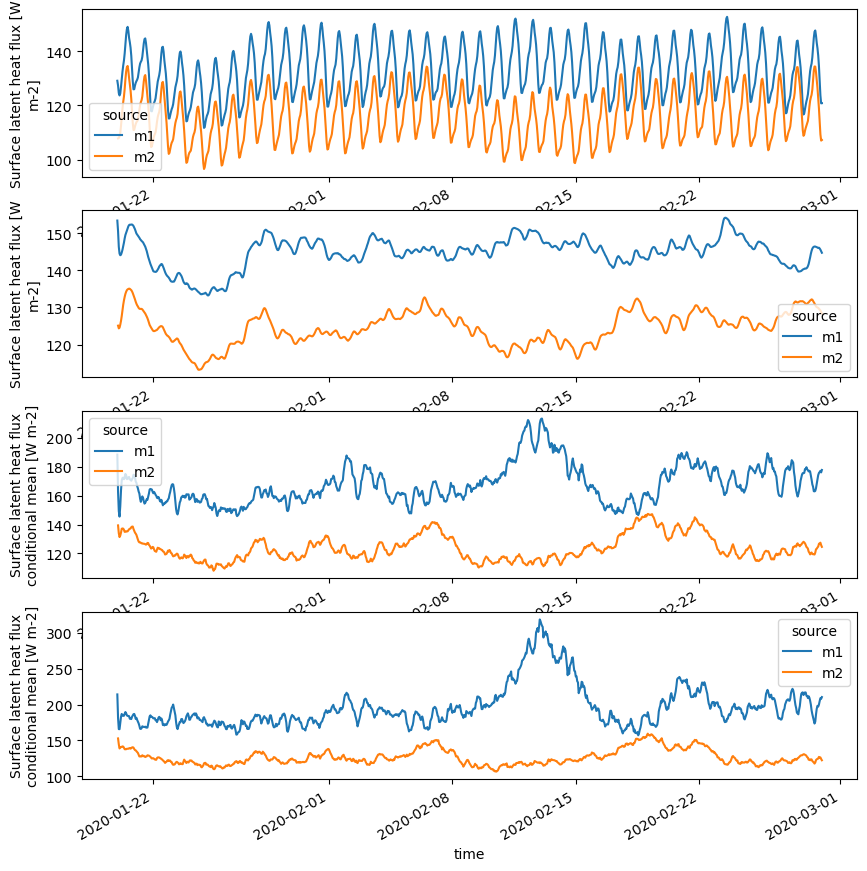

In [6]:
fig, axes = plt.subplots(4, 1, figsize=[10,10], dpi=100)
ax0 = axes[0]
xr.plot.line(dse.lhx, x='time', ax=ax0)
ax1 = axes[1]
xr.plot.line(dse.lhx_ocean, x='time', ax=ax1)
ax2 = axes[2]
xr.plot.line(dse.lhx_ocean_ccs_cond, x='time', ax=ax2)
ax3 = axes[3]
xr.plot.line(dse.lhx_ocean_mcs_cond, x='time', ax=ax3)